In [1]:
import os
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")#忽略警告

import datetime
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from calendar import day_abbr, month_abbr, mdays
# import holidays
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('./data/preprocessed/data.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'].astype('str'))
df.set_index('Date',drop=True,inplace=True)

In [4]:
x = df.iloc[:,1:]  # features
x_train=x.loc[:'2022-02-28',:]
x_test=x.loc['2022-03-01':,:]
y = df.loc[:, ['Price']]  # target
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]

In [5]:
# Pre-process data
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

### Linear regression without time offset

In [6]:
def linear(X,Y):    
    for n in X.iloc[:,0:]:
        # Training data
        x = pd.DataFrame(X[str(n)] ) # features
        x_train=x.loc[:'2022-02-28',:]
        X_test=x.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        # Train the model
        scaler = StandardScaler() 
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(X_test)
        model = LinearRegression()
        model.fit(x_train, y_train)

        # Store the fitted values as a time series with the same time index as
        # the training data
        y_pred = pd.Series(model.predict(x_test).T[0], index=X_test.index)
        print(str(n),'\nMSE:',MSE(y_test,y_pred),'\nr2_score:', R2(y_test,y_pred),'\nMAPE:', MAPE(y_test,y_pred),'\n')


In [7]:
x.isnull().any()

GDP          False
netimport    False
EV           False
EG           False
carbon       False
crude        False
gas          False
temp         False
precip       False
wind         False
dtype: bool

In [8]:
linear(x,y)

GDP 
MSE: 665.1605350125668 
r2_score: -0.04145064392739295 
MAPE: 0.7711907999426424 

netimport 
MSE: 641.0099046582469 
r2_score: -0.003637682679949572 
MAPE: 0.6183468225819554 

EV 
MSE: 653.5002875307462 
r2_score: -0.023194040281980355 
MAPE: 0.5891400130053301 

EG 
MSE: 961.64868605214 
r2_score: -0.5056660619560225 
MAPE: 1.2943781203302236 

carbon 
MSE: 677.4511771469784 
r2_score: -0.06069426481497642 
MAPE: 0.9351147213372897 

crude 
MSE: 1211.8831551081255 
r2_score: -0.8974614785711437 
MAPE: 1.4827483883145836 

gas 
MSE: 844.8530238775168 
r2_score: -0.32279754950377737 
MAPE: 1.187031760651037 

temp 
MSE: 657.9755506269679 
r2_score: -0.030201018880337438 
MAPE: 0.6349993784541189 

precip 
MSE: 665.3460085346684 
r2_score: -0.04174104227314035 
MAPE: 0.5346228536079787 

wind 
MSE: 723.8258981697774 
r2_score: -0.13330377865246645 
MAPE: 0.6787727957997903 



In [9]:
xtrain=x_train.copy()
xtest=x_test.copy()
ytrain=y_train.copy()
ytest=y_test.copy()

In [10]:
X_train=xtrain.loc[:,['GDP','gas','crude','EG']]
X_test=xtest.loc[:,['GDP','gas','crude','EG']]
# Train the model
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, ytrain)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X_test).T[0], index=xtest.index)
print('MSE:',MSE(ytest,y_pred),'\nr2_score:', R2(ytest,y_pred),'\nMAPE:', MAPE(ytest,y_pred),'\n')

MSE: 580.4850627003362 
r2_score: 0.09112686258802694 
MAPE: 0.454780624245515 



In [11]:
model.coef_

array([[ 0.01903826,  4.92833161, -0.26800289, -0.79097371]])

In [12]:
y_pred.name='Price_pred'

In [13]:
ytest.name='Price_true'

In [14]:
res=pd.concat([X_test,ytest,y_pred],axis=1)

In [15]:
res

,GDP,gas,crude,EG,Price,Price_pred
Date,,,,,,
2022-03-01,53451.045382,4.573000,100.849998,181.440305,13.68,28.824407
2022-03-02,53448.220292,4.762000,112.930000,181.488628,13.28,26.426380
2022-03-03,53445.373356,4.722000,110.459999,181.536982,20.63,26.798768
2022-03-04,53442.504489,5.016000,118.110001,181.585366,23.72,26.104584
2022-03-05,53439.613610,5.161544,121.792486,181.633780,14.89,25.741623
...,...,...,...,...,...,...
2022-04-26,53256.877019,6.850000,104.989998,184.189287,23.94,33.065686
2022-04-27,53252.699646,7.267000,105.320000,184.239084,43.43,34.913442
2022-04-28,53248.495739,6.888000,107.589996,184.288904,19.30,32.317797


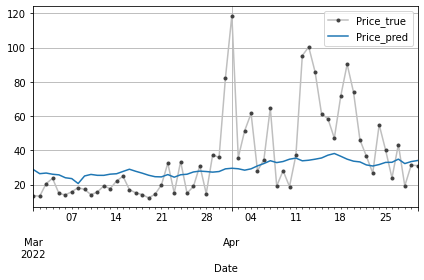

In [16]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
    linewidth=1.5
)
ytest.columns=['Price_true']
ytest.plot(**plot_params)
y_pred.plot(label='Price_pred')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

In [17]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
def linear1(Xdata,Y):    
    for n in Xdata.iloc[:,0:1]:
        x = pd.DataFrame(Xdata[str(n)] )
        X = sm.add_constant(x)
        model = sm.OLS(Y,X)
        results = model.fit()
        plt.scatter(x,Y,alpha=0.3)
        y_predict = results.params[0] + results.params[1]*x
        print(str(n))
        plt.plot(x,y_predict, linewidth=3)
        plt.xlabel(str(n))
        plt.ylabel('Power Price')
        plt.title('OLS Regression')
        print(results.summary())
        plt.show()
        print('\n\n\n')
    return results

GDP
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     424.8
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           3.56e-81
Time:                        13:27:53   Log-Likelihood:                -5265.4
No. Observations:                1216   AIC:                         1.053e+04
Df Residuals:                    1214   BIC:                         1.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -758.0729     38.315    -19.785     

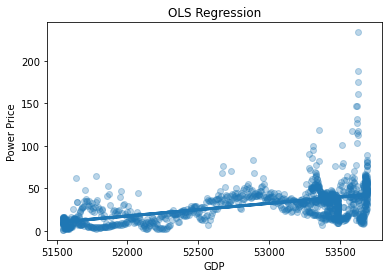

In [18]:
results=linear1(x,y)

### Linear regression with time offset

#### autoregression

In [19]:
shift=1
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(shift)
Df = Df.reindex(columns=['Price', 'Lag_1'])
X = Df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = Df.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

In [20]:
def linearshift():  
    for shift in range(1,32):
        Df=df.copy()
        Df['Lag'] = Df['Price'].shift(shift)
        Df = Df.reindex(columns=['Price', 'Lag'])
        X = Df.loc[:, ['Lag']]
        X.dropna(inplace=True)  # drop missing values in the feature set
        y = Df.loc[:, ['Price']]  # create the target
        y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

        x_train=X.loc[:'2022-02-28',:]
        x_test=X.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        model = LinearRegression()
        model.fit(x_train, y_train)

        y_pred = pd.Series(model.predict(x_test).T[0], index=x_test.index)
        print('MSE:',MSE(ytest,y_pred),'\nr2_score:', R2(ytest,y_pred),'\nMAPE:', MAPE(ytest,y_pred),'\n')

In [21]:
linearshift()

MSE: 397.5793114852559 
r2_score: 0.377504815509377 
MAPE: 0.4014530929137329 

MSE: 581.1330355809501 
r2_score: 0.0901123228818338 
MAPE: 0.41856343383768035 

MSE: 603.665005058471 
r2_score: 0.05483372036992584 
MAPE: 0.41120513660307173 

MSE: 701.7219267832842 
r2_score: -0.09869529841035307 
MAPE: 0.47494596668627803 

MSE: 610.3946298219911 
r2_score: 0.04429705790358551 
MAPE: 0.4473152027681309 

MSE: 567.2144371553052 
r2_score: 0.11190485645822956 
MAPE: 0.4332053990473793 

MSE: 677.7773233852366 
r2_score: -0.06120491629228053 
MAPE: 0.5152278470082219 

MSE: 715.8998996182999 
r2_score: -0.12089393792875613 
MAPE: 0.5419287311867176 

MSE: 743.2031869683526 
r2_score: -0.16364305591650607 
MAPE: 0.5528570307984884 

MSE: 716.2397653905263 
r2_score: -0.12142607026178376 
MAPE: 0.54353153260941 

MSE: 616.6284273174132 
r2_score: 0.03453671874636577 
MAPE: 0.5039070513161734 

MSE: 571.7409798197859 
r2_score: 0.10481758876186931 
MAPE: 0.4961388802277892 

MSE: 594.66644

In [22]:
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift()
Df = Df.reindex(columns=['Price', 'Lag_1'])
X = Df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = Df.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

In [23]:
# x_trainl=X.loc['2019-01-02':'2022-01-31',:]
# x_testl=X.loc['2022-02-01':'2022-04-30',:]
# y_trainl=y.loc['2019-01-02':'2022-01-31',:]
# y_testl=y.loc['2022-02-01':'2022-04-30',:]
x_trainl=X.loc[:'2022-02-28',:]
x_testl=X.loc['2022-03-01':,:]
y_trainl=y.loc[:'2022-02-28',:]
y_testl=y.loc['2022-03-01':,:]

In [24]:
model = LinearRegression()
model.fit(x_trainl, y_trainl)

y_predl = pd.Series(model.predict(x_testl).T[0], index=x_testl.index)

In [25]:
print('MSE:%f, r2 score:%f and MAPE:%f' %(MSE(y_testl,y_predl), R2(y_testl,y_predl),MAPE(y_testl,y_predl)))

MSE:397.579311, r2 score:0.377505 and MAPE:0.401453


In [26]:
print('The corresponding coefficient of linear model is %f.' %model.coef_)

The corresponding coefficient of linear model is 0.894835.


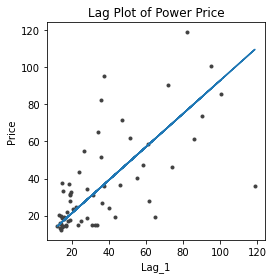

In [27]:
fig, ax = plt.subplots()
ax.plot(x_testl, y_testl, '.', color='0.25')
ax.plot(x_testl, y_predl)
ax.set_aspect('equal')
ax.set_ylabel('Price')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Power Price');

In [28]:
x_testl

,Lag_1
Date,
2022-03-01,15.13
2022-03-02,13.68
2022-03-03,13.28
2022-03-04,20.63
2022-03-05,23.72
...,...
2022-04-26,40.27
2022-04-27,23.94
2022-04-28,43.43


In [29]:
y_predl

Date
2022-03-01    16.828128
2022-03-02    15.530618
2022-03-03    15.172684
2022-03-04    21.749719
2022-03-05    24.514758
                ...    
2022-04-26    39.324272
2022-04-27    24.711622
2022-04-28    42.151950
2022-04-29    20.559589
2022-04-30    31.413934
Length: 61, dtype: float64

In [30]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
    linewidth=1.5
)

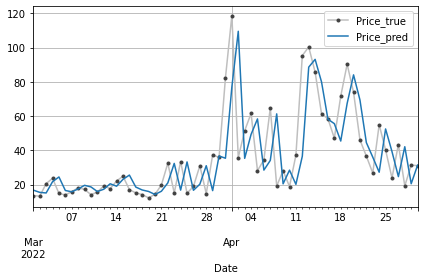

In [31]:
y_testl.columns=['Price_true']
ax = y_testl.plot(**plot_params)
ax = y_predl.plot(label='Price_pred')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

residual Mean: 0.759294,Median: -0.284880, skewness -0.251569, kurtosis: 3.324114


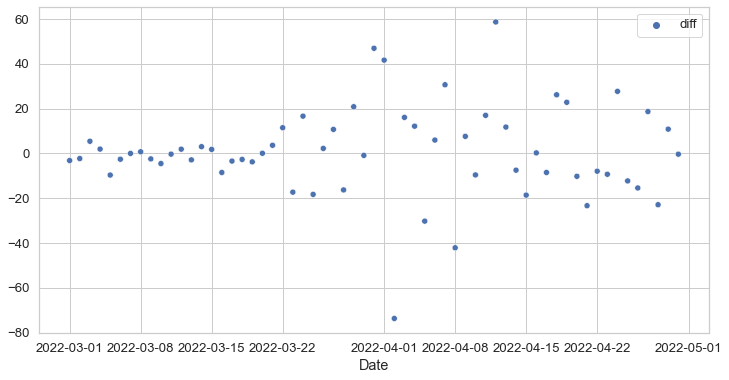

In [32]:
residual=y_testl.Price_true-pd.DataFrame(y_predl,columns=['Price_pred']).Price_pred
residual=pd.DataFrame(residual,columns=['diff'])
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth':1}) 
sns.scatterplot(data=residual)
print('residual Mean: %f,Median: %f, skewness %f, kurtosis: %f' 
      %(residual.mean(),residual.median(),residual.skew(),residual.kurt()))

#### regression with elements

In [33]:
def linear2(Df,n):
    df=Df.copy()
    df['Lag_1'] = df['Price'].shift(1)
    df['Lag '+n] = df[n].shift(1)
    df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
    X = df.loc[:, ['Lag '+n,'Lag_1']]
    X.dropna(inplace=True)  # drop missing values in the feature set
    y = df.loc[:, ['Price']]  # create the target
    y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
#     x_train=X.loc['2019-01-02':'2022-01-31',:]
#     x_test=X.loc['2022-02-01':'2022-04-30',:]
#     y_train=y.loc['2019-01-02':'2022-01-31',:]
#     y_test=y.loc['2022-02-01':'2022-04-30',:]
    x_train=X.loc[:'2022-02-28',:]
    x_test=X.loc['2022-03-01':,:]
    y_train=y.loc[:'2022-02-28',:]
    y_test=y.loc['2022-03-01':,:]
    scaler = MinMaxScaler() 
    x_train1 = scaler.fit_transform(x_train)
    x_test1 = scaler.transform(x_test)
    scaler = StandardScaler()
    x_train2 = scaler.fit_transform(x_train)
    x_test2 = scaler.transform(x_test)

    model = LinearRegression()
    model.fit(x_train1, y_train)

    y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
    print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))

    fig, ax = plt.subplots()
    ax = sns.regplot(x='Lag '+n, y='Price', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_title('Lag '+n+' of Power Price')
    
#     plt.plot(x_test['Lag'+n],y_test, '.', color='0.25')
#     plt.plot(x_test['Lag'+n],y_pred)
# #     plt.set_aspect('equal')
#     plt.ylabel('Price')
#     plt.xlabel('Lag '+n)
#     plt.title('Lag Plot of Power Price');
    
    plot_params = dict(
        color="0.75",
        style=".-",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
        legend=False,
        linewidth=1.5
    )
    y_test.plot(**plot_params)
    y_pred.plot()
    plt.grid()
    plt.tight_layout()

MSE:385.891377, r2 score:0.395805 and MAPE:0.414399 



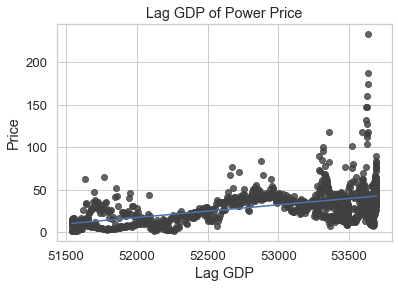

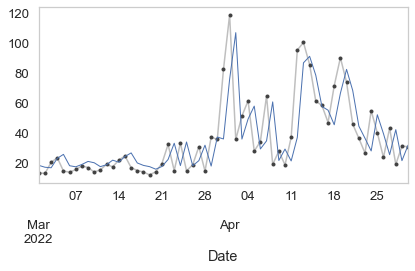

In [34]:
linear2(df,'GDP')

In [35]:
def linear3(Df,n):
    df=Df.copy()
    for m in range(1,31):
        df['Lag_1'] = df['Price'].shift(1)
        df['Lag '+n] = df[n].shift(m)
        df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
        X = df.loc[:, ['Lag '+n,'Lag_1']]
        X.dropna(inplace=True)  # drop missing values in the feature set
        y = df.loc[:, ['Price']]  # create the target
        y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
    #     x_train=X.loc['2019-01-02':'2022-01-31',:]
    #     x_test=X.loc['2022-02-01':'2022-04-30',:]
    #     y_train=y.loc['2019-01-02':'2022-01-31',:]
    #     y_test=y.loc['2022-02-01':'2022-04-30',:]
        x_train=X.loc[:'2022-02-28',:]
        x_test=X.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        scaler = MinMaxScaler() 
        x_train1 = scaler.fit_transform(x_train)
        x_test1 = scaler.transform(x_test)
        scaler = StandardScaler()
        x_train2 = scaler.fit_transform(x_train)
        x_test2 = scaler.transform(x_test)

        model = LinearRegression()
        model.fit(x_train1, y_train)

        y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
        print('%d MSE:%f, r2 score:%f and MAPE:%f \n' %(m, MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


In [36]:
linear3(df,'EV')

1 MSE:397.448775, r2 score:0.377709 and MAPE:0.401765 

2 MSE:397.624212, r2 score:0.377435 and MAPE:0.401527 

3 MSE:397.599699, r2 score:0.377473 and MAPE:0.401339 

4 MSE:397.596354, r2 score:0.377478 and MAPE:0.401303 

5 MSE:397.586698, r2 score:0.377493 and MAPE:0.401254 

6 MSE:397.573219, r2 score:0.377514 and MAPE:0.401198 

7 MSE:397.559411, r2 score:0.377536 and MAPE:0.401145 

8 MSE:397.560102, r2 score:0.377535 and MAPE:0.401127 

9 MSE:397.545251, r2 score:0.377558 and MAPE:0.401072 

10 MSE:397.532599, r2 score:0.377578 and MAPE:0.401026 

11 MSE:397.532761, r2 score:0.377578 and MAPE:0.401011 

12 MSE:397.523675, r2 score:0.377592 and MAPE:0.400975 

13 MSE:397.515030, r2 score:0.377605 and MAPE:0.400942 

14 MSE:397.532425, r2 score:0.377578 and MAPE:0.400973 

15 MSE:397.498467, r2 score:0.377631 and MAPE:0.400847 

16 MSE:397.465684, r2 score:0.377683 and MAPE:0.400773 

17 MSE:397.445701, r2 score:0.377714 and MAPE:0.400732 

18 MSE:397.402115, r2 score:0.377782 and

In [37]:
df1=Df.copy()

In [38]:
Df

,Price,Lag_1
Date,,
2019-01-01,22.58,NaN
2019-01-02,42.65,22.58
2019-01-03,51.90,42.65
2019-01-04,50.85,51.90
2019-01-05,50.72,50.85
...,...,...
2022-04-26,23.94,40.27
2022-04-27,43.43,23.94
2022-04-28,19.30,43.43


In [39]:
# n='EV'
# df1['Lag '+n] = df[n].shift(1) 
X = df1.iloc[:, 1:]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

x_train=X.loc[:'2022-02-28',:]
x_test=X.loc['2022-03-01':,:]
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train1, y_train)
y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


MSE:397.579311, r2 score:0.377505 and MAPE:0.401453 



In [40]:
model.coef_

array([[208.10275855]])

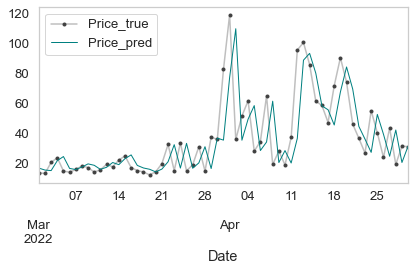

In [41]:
y_test.columns=['Price_true']
ax = y_test.plot(**plot_params)
ax = y_pred.plot(label='Price_pred',color='teal')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

In [42]:
df2=df1.copy()

In [43]:
df1=df2.copy()

MSE:385.891377, r2 score:0.395805 and MAPE:0.414399 1

MSE:385.420568, r2 score:0.396542 and MAPE:0.418941 2

MSE:385.267151, r2 score:0.396782 and MAPE:0.401923 16  

MSE:384.837742, r2 score:0.397454 and MAPE:0.388549 1

MSE:378.607545, r2 score:0.407209 and MAPE:0.401401  11

carbon X

MSE:377.087824, r2 score:0.409589 and MAPE:0.400438 5

MSE:376.538162, r2 score:0.410449 and MAPE:0.412878 1

MSE:376.401796, r2 score:0.410663 and MAPE:0.412103 1

EV X

In [44]:
df1=Df.copy()
n='GDP'
df1['Lag '+n] = df[n].shift(1) 
n='gas'
df1['Lag '+n] = df[n].shift(2) 
n='crude'
df1['Lag '+n] = df[n].shift(16) 
n='EG'
df1['Lag '+n] = df[n].shift(1) 
n='wind'
df1['Lag '+n] = df[n].shift(11) 
n='temp'
df1['Lag '+n] = df[n].shift(5) 
n='netimport'
df1['Lag '+n] = df[n].shift(1) 
n='precip'
df1['Lag '+n] = df[n].shift(1) 
X = df1.iloc[:, 1:]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

x_train=X.loc[:'2022-02-28',:]
x_test=X.loc['2022-03-01':,:]
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train1, y_train)
y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))

MSE:376.401796, r2 score:0.410663 and MAPE:0.412103 



In [45]:
model.coef_

array([[ 1.92366971e+02,  6.07202811e+00,  1.87225530e+00,
         1.62086504e-02, -2.86925064e+00, -4.67832297e+00,
        -8.50465227e-01,  2.71585758e+00,  2.26120015e-01]])

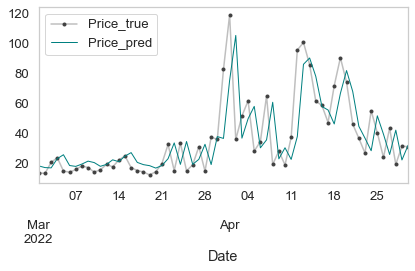

In [46]:
y_test.columns=['Price_true']
ax = y_test.plot(**plot_params)
ax = y_pred.plot(label='Price_pred',color='teal')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

In [47]:
residual=y_test.Price_true-pd.DataFrame(y_pred,columns=['Price_pred']).Price_pred
residual=pd.DataFrame(residual,columns=['diff'])

<AxesSubplot:xlabel='Date'>

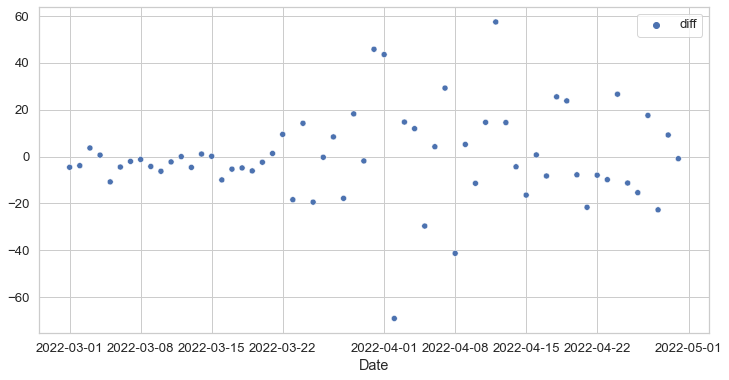

In [48]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth':1}) 
sns.scatterplot(data=residual)

In [49]:
print('residual Mean: %f,Median: %f, skewness %f, kurtosis: %f' 
      %(residual.mean(),residual.median(),residual.skew(),residual.kurt()))

residual Mean: -0.134479,Median: -2.070275, skewness -0.014651, kurtosis: 3.007589


In [50]:
residual.mean()

diff   -0.134479
dtype: float64

In [51]:
residual.median()

diff   -2.070275
dtype: float64